<div class="alert alert-block alert-info">

<h1 style="font-family:verdana;"> Description:</h1> 

<ul>
<li><p style="font-family:verdana;">
In this notebook, we are going to predict whether a person's income is above 50k or below 50k using various features like age, education, and occupation.
</p></li>
    


<li><p style="font-family:verdana;">
The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.
</p></li>  
</ul>

</div>

### Importing Libraries

In [93]:
import numpy as np
import pandas as pd
import os
from os import path
from wordcloud import WordCloud
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)
from sklearn import metrics
from sklearn.metrics import auc, confusion_matrix, plot_confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as SklearnLinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer

### Importing the dataset

In [2]:
dataset = pd.read_csv('/content/train.csv')

In [3]:
dataset.tail()

,Unnamed: 0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
43952,43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
43953,43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States
43954,43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States
43955,43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States
43956,43956,30,Private,375827,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,White,Male,0,0,40,United-States


In [4]:
train_labels = pd.read_csv("/content/train_class_labels.csv")

In [5]:
train_labels.shape

(43957, 2)

In [6]:
dataset['income'] = train_labels.iloc[:,1]

In [7]:
dataset.shape

(43957, 16)

In [8]:
dataset = dataset.drop('Unnamed: 0', axis=1)

## Step 1: Descriptive analysis

In [ ]:
# Preview dataset
dataset.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0
43956,30,Private,375827,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,White,Male,0,0,40,United-States,0


In [ ]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(dataset.shape[0], dataset.shape[1]))

Rows: 43957 Columns: 15


In [ ]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income           43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [ ]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43957.0,38.617149,13.734401,17.0,28.0,37.0,48.0,90.0
fnlwgt,43957.0,189673.004368,105821.522560,13492.0,117496.0,178100.0,237671.0,1490400.0
educational-num,43957.0,10.074118,2.575092,1.0,9.0,10.0,12.0,16.0
capital-gain,43957.0,1093.559797,7570.536063,0.0,0.0,0.0,0.0,99999.0
capital-loss,43957.0,88.246491,404.588410,0.0,0.0,0.0,0.0,4356.0
hours-per-week,43957.0,40.407694,12.400303,1.0,40.0,40.0,45.0,99.0
income,43957.0,0.239279,0.426648,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Check for null values
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age                 0.0 %
workclass          5.68 %
fnlwgt              0.0 %
education           0.0 %
educational-num     0.0 %
marital-status      0.0 %
occupation          5.7 %
relationship        0.0 %
race                0.0 %
gender              0.0 %
capital-gain        0.0 %
capital-loss        0.0 %
hours-per-week      0.0 %
native-country     1.74 %
income              0.0 %
dtype: object

In [ ]:
# Checking the counts of label categories
income = dataset['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

0    76.07 %
1    23.93 %
Name: income, dtype: object

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
    
<li><p style="font-family:verdana;">
The dataset have any null values in workclass, occupation, native-country, which needs to be preprocessed.
</p></li>    

<li><p style="font-family:verdana;">
The dataset is unbalanced, as the dependent feature 'income' contains 76.07% values have income less than 50k and 23.93% values have income more than 50k.
</p></li>    

</ul>

</div>

## Step 2: Exploratory Data Analysis

### 2.1: Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


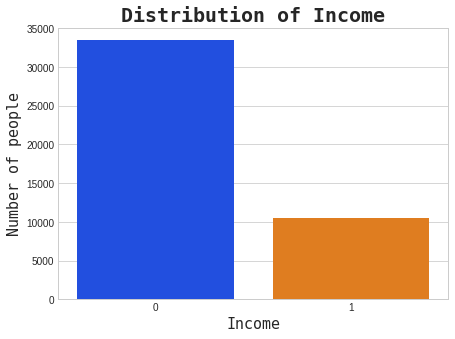

In [ ]:
# Creating a barplot for 'Income'
income = dataset['income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

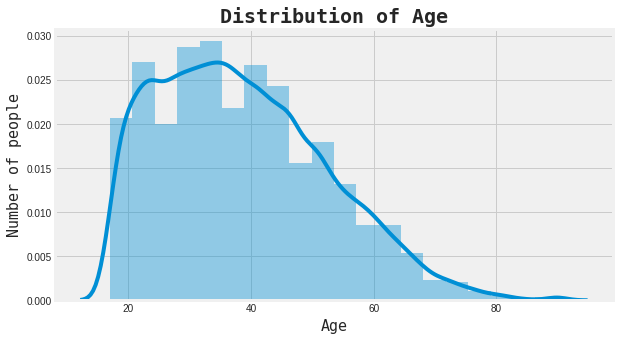

In [ ]:
# Creating a distribution plot for 'Age'
age = dataset['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(dataset['age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

The above graph shows that highest number of people in training dataset are of age 38 approx

In [ ]:
print('precise median age for >50K income : ',dataset[dataset['income']==1]['age'].median(), 'yrs')

precise median age for >50K income :  43.0 yrs


In [ ]:
print('precise median age for <=50K income : ',dataset[dataset['income']==0]['age'].median(), 'yrs')

precise median age for <=50K income :  34.0 yrs


MEDIAN value for people earning <=50K is around 34yrs, presicely.
</p></li> 
MEDIAN value for people earing >50K is around 43yrs.
</p></li> 


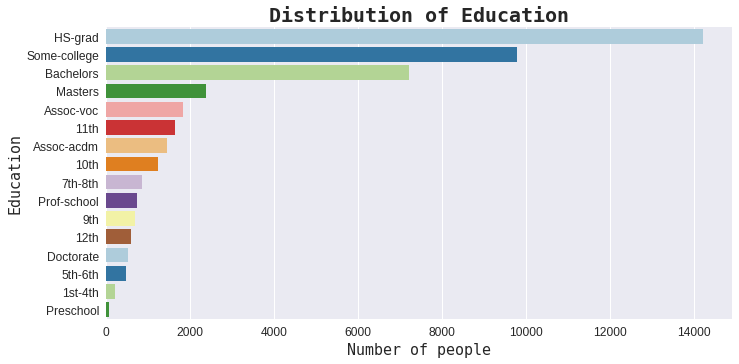

In [ ]:
# Creating a barplot for 'Education'
edu = dataset['education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

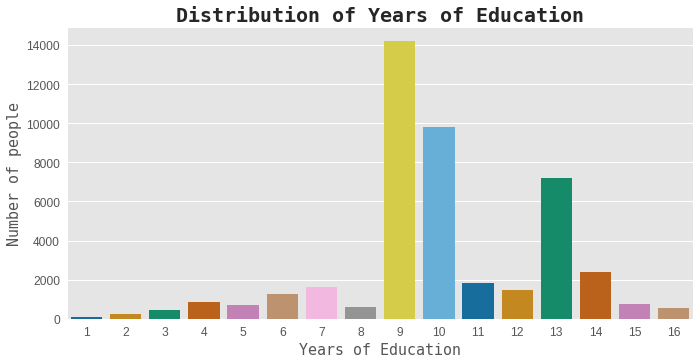

In [ ]:
# Creating a barplot for 'Years of Education'
edu_num = dataset['educational-num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(edu_num.index, edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

For Bachelors, the Education Number is [13] </p>
For HS-grad, the Education Number is [9] </p>
For 11th, the Education Number is [7] </p>
For Masters, the Education Number is [14] </p></li> 
For 9th, the Education Number is [5] </p></li> 
For Some-college, the Education Number is [10] </p></li> 
For Assoc-acdm, the Education Number is [12]</p></li> 
For Assoc-voc, the Education Number is [11]</p></li> 
For 7th-8th, the Education Number is [4]</p></li> 
For Doctorate, the Education Number is [16]</p></li> 
For Prof-school, the Education Number is [15]</p></li> 
For 5th-6th, the Education Number is [3]</p></li> 
For 10th, the Education Number is [6]</p></li> 
For 1st-4th, the Education Number is [2]</p></li> 
For Preschool, the Education Number is [1]</p></li> 
For 12th, the Education Number is [8]</p></li> 

We see that **Education Number** and **Education** are just the same, so, Education of them column could be droped.


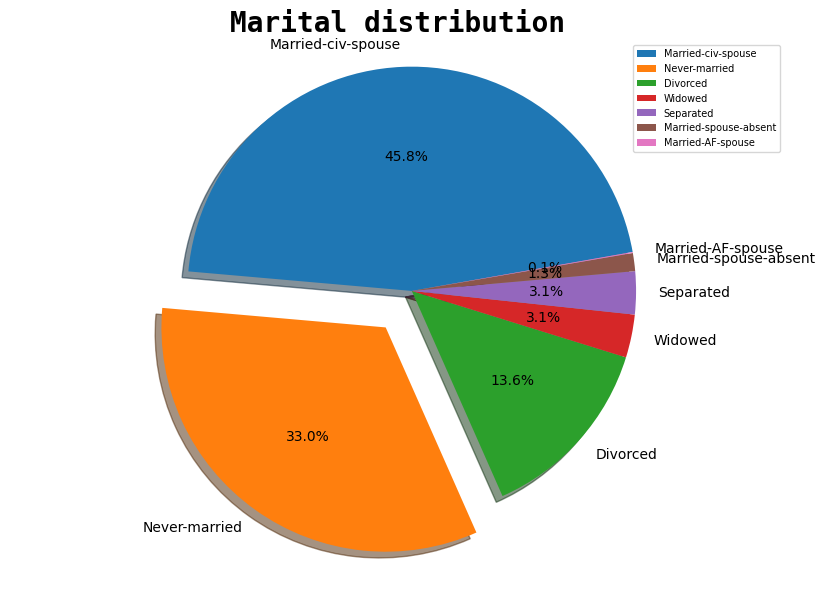

In [ ]:
# Creating a pie chart for 'Marital status'
marital = dataset['marital-status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

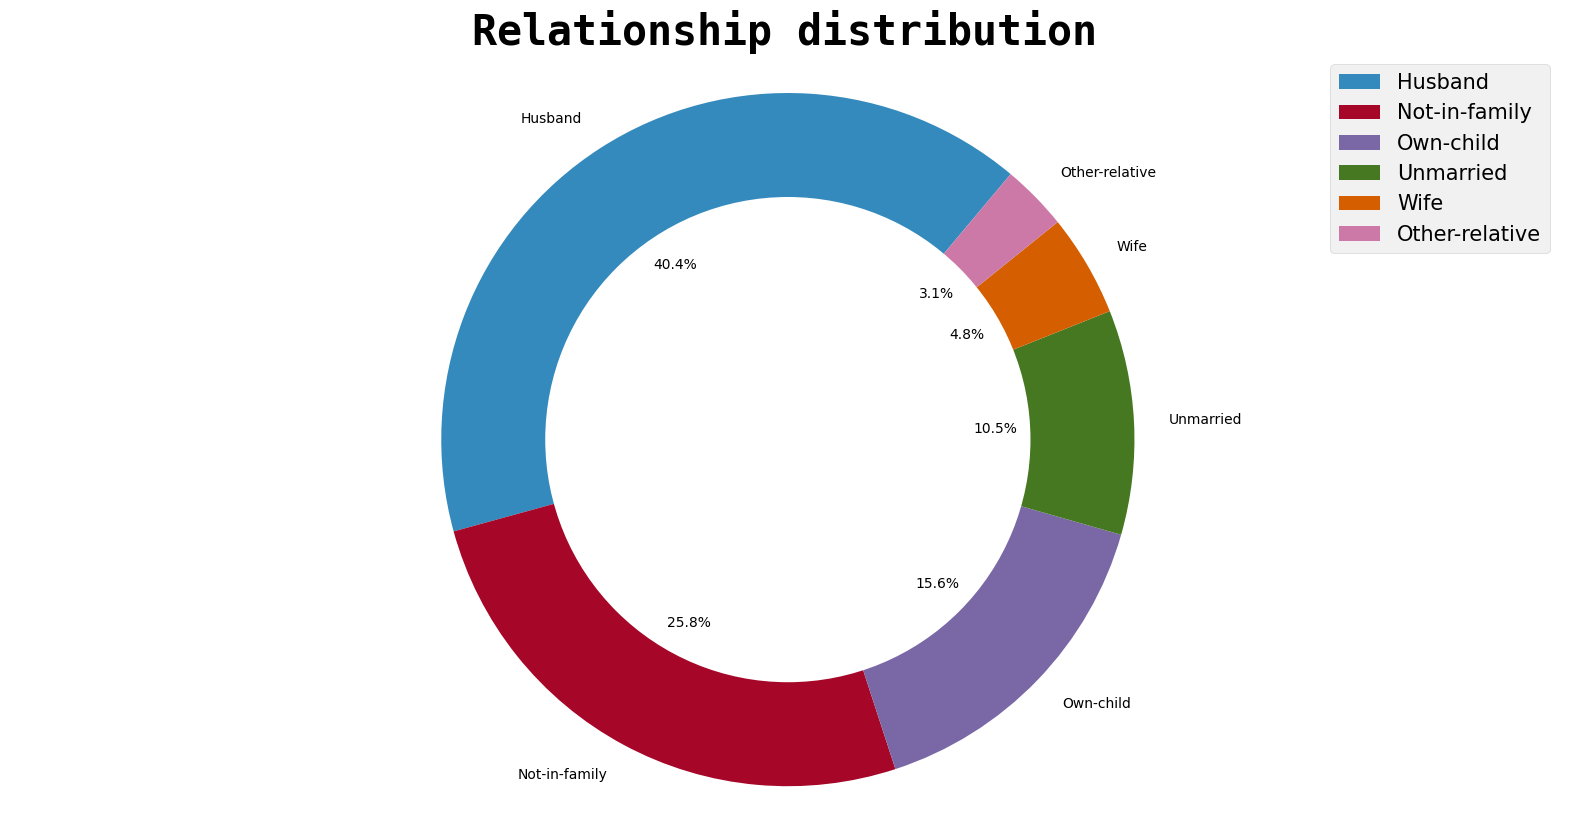

In [ ]:
# Creating a donut chart for 'Age'
relation = dataset['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

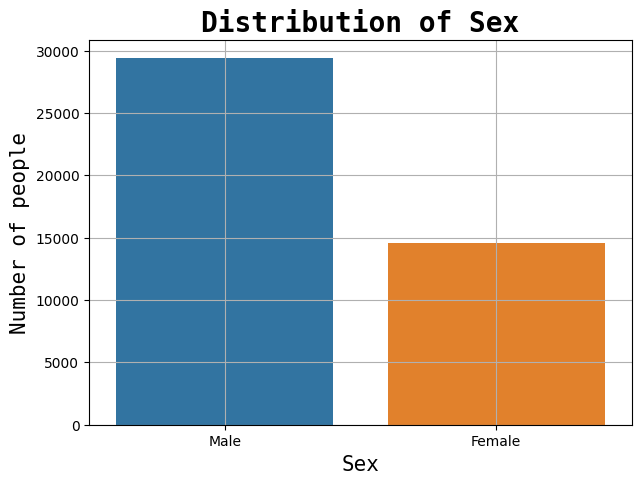

In [ ]:
# Creating a barplot for 'Sex'
sex = dataset['gender'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

In [ ]:
!pip install squarify

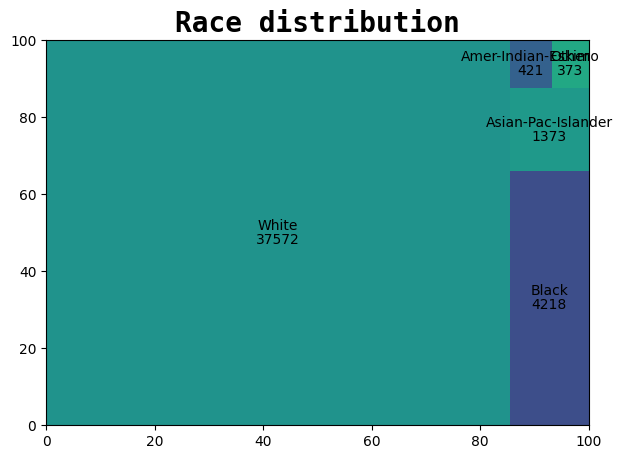

In [ ]:
# Creating a Treemap for 'Race'
import squarify
race = dataset['race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

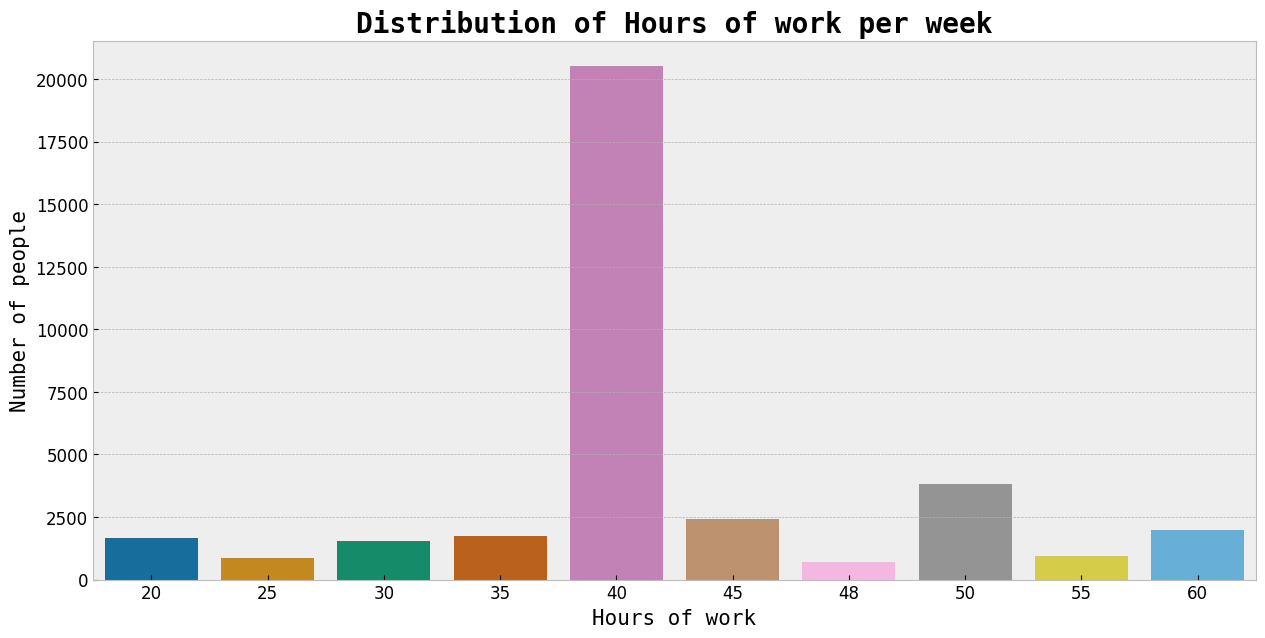

In [ ]:
# Creating a barplot for 'Hours per week'
hours = dataset['hours-per-week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()



* Above dataset shows that most of the people work around 40 hours per weeks



### 2.2 Bivariate Analysis

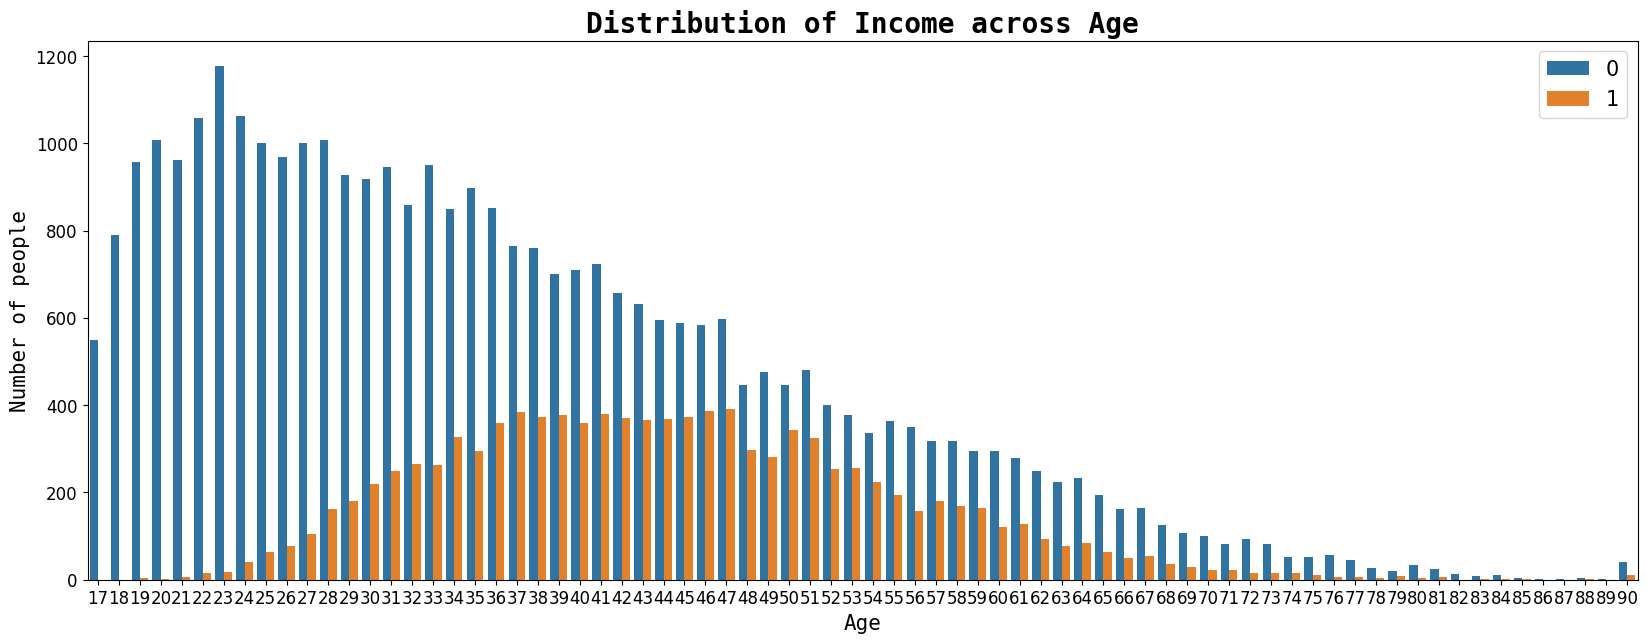

In [ ]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(dataset['age'], hue=dataset['income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

As we can observe from the graph 37-47 age people have more income

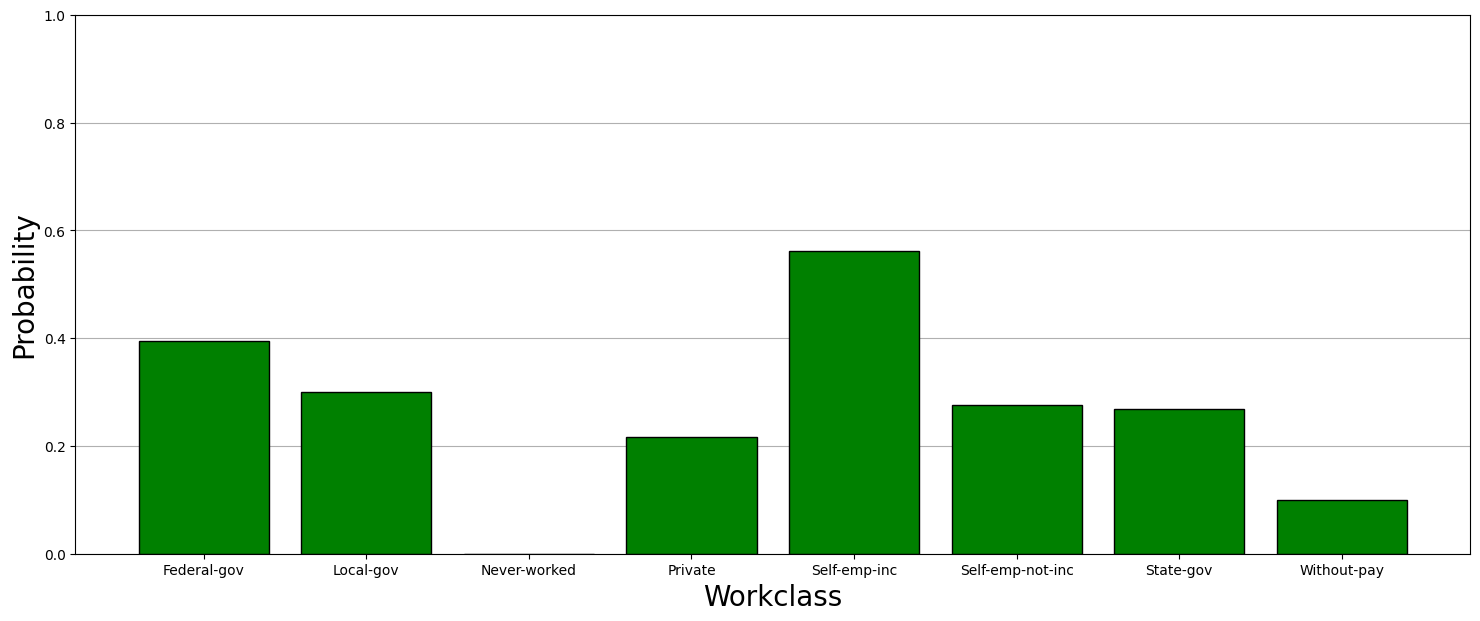

In [ ]:
# probability of belonging to the group with the highest income
workclass_income = dataset.groupby('workclass')['income'].mean() # there is correlation as expected

plt.rcParams['axes.axisbelow'] = True # grid behind graphs bars
plt.figure(figsize=(18, 7))
plt.ylim(0,1) # values from 0 to 1 as there are probabilities
plt.bar(workclass_income.index.astype(str), workclass_income,
       color = 'green' , edgecolor='black' )
plt.ylabel('Probability', size=20)
plt.xlabel('Workclass', size=20)
plt.grid(axis='y')


*   As we can see in the above diagram self-employment peeps have higher probability of getting salary >50k




No handles with labels found to put in legend.


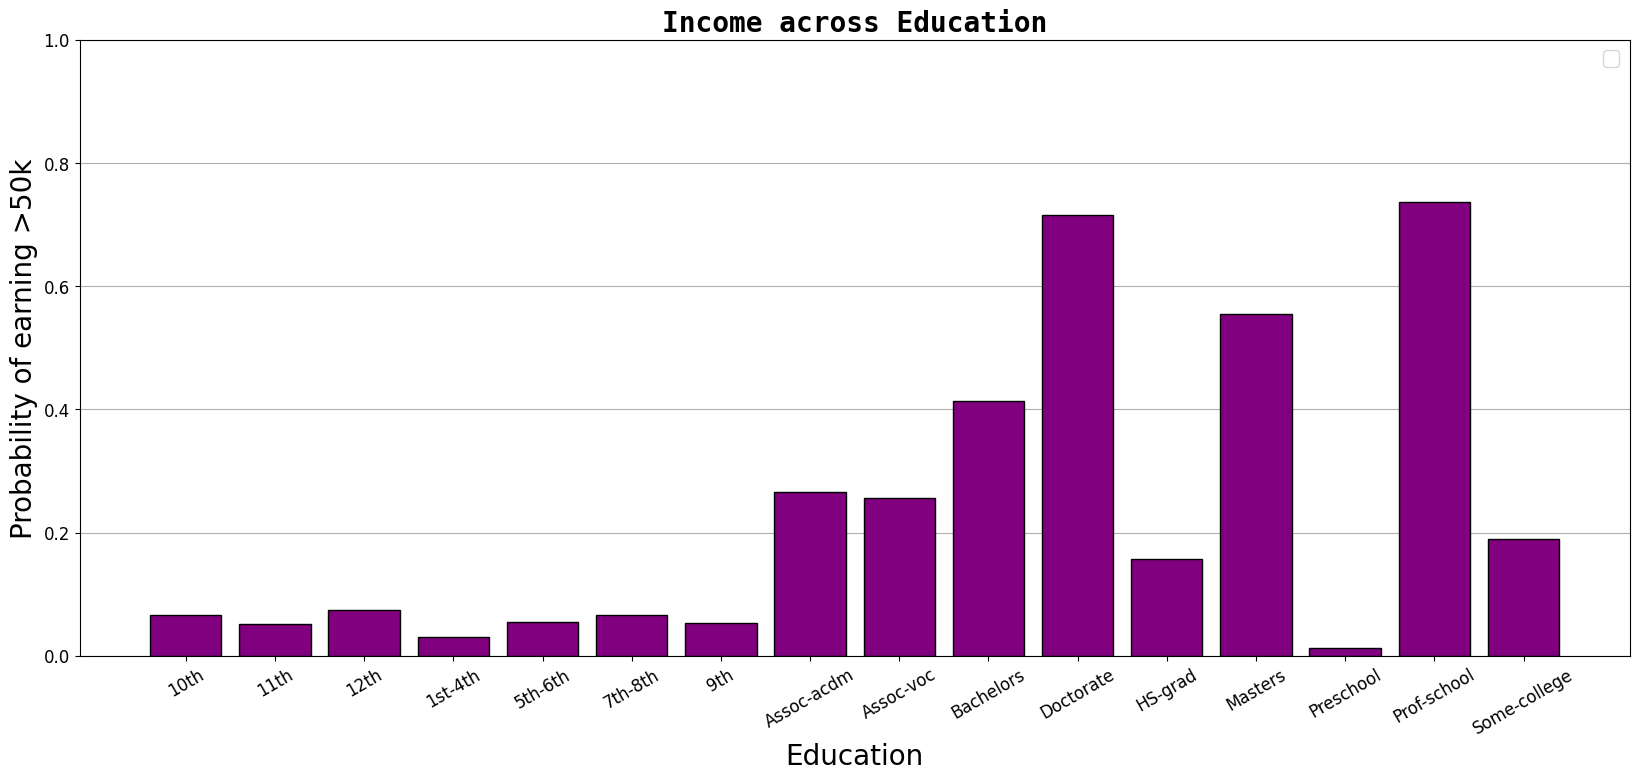

In [ ]:
# probability of belonging to the group with the highest income
education_income = dataset.groupby('education')['income'].mean()

plt.figure(figsize=(20, 8))
plt.ylim(0,1)
plt.xticks(rotation=30) # rotate axis text
plt.bar(education_income.index.astype(str), education_income,
       color = 'purple', edgecolor='black' )
plt.title('Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Probability of earning >50k', size=20)
plt.xlabel('Education', size=20)
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.grid(axis='y')



*   From the above graph we can infer that doctorate and prof-school educated people have more probability of getting salary of >50k




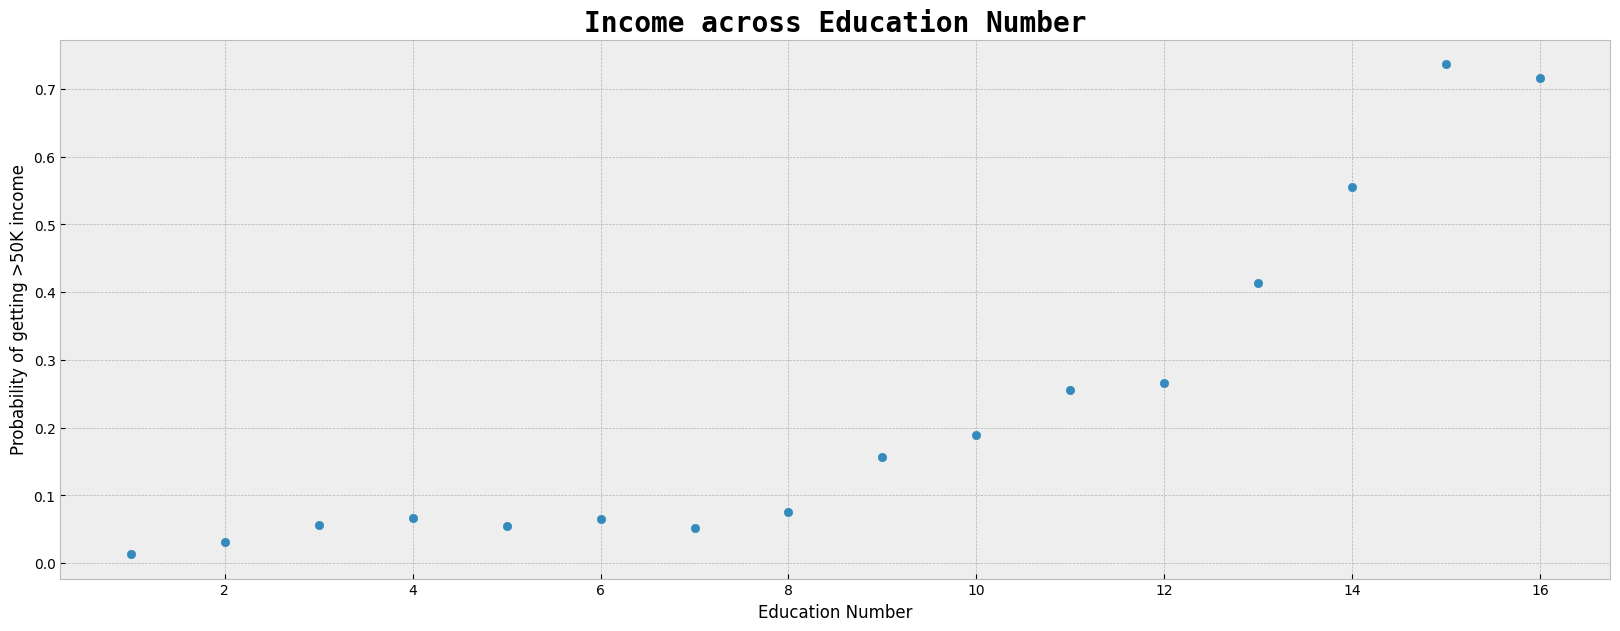

In [ ]:
dt = {}
dttotl = dict(dataset['educational-num'].value_counts())
prob = {}

for index, row in dataset.iterrows():
    
    if (row['income'] == 1):
        try:
            dt[row['educational-num']] += 1
        except:
            dt[row['educational-num']] = 1

for key in dt:
    prob[key] = dt[key] / dttotl[key]

edulvl = list(prob.keys())
pb = list(prob.values())

plt.figure(figsize = (20, 7))
plt.scatter(edulvl, pb)
plt.title('Income across Education Number', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel("Education Number")
plt.ylabel("Probability of getting >50K income")
plt.show()



*   Above scatter plot shows the correlation between income (here scale of income is probability form) and education(here education is represented by education number)




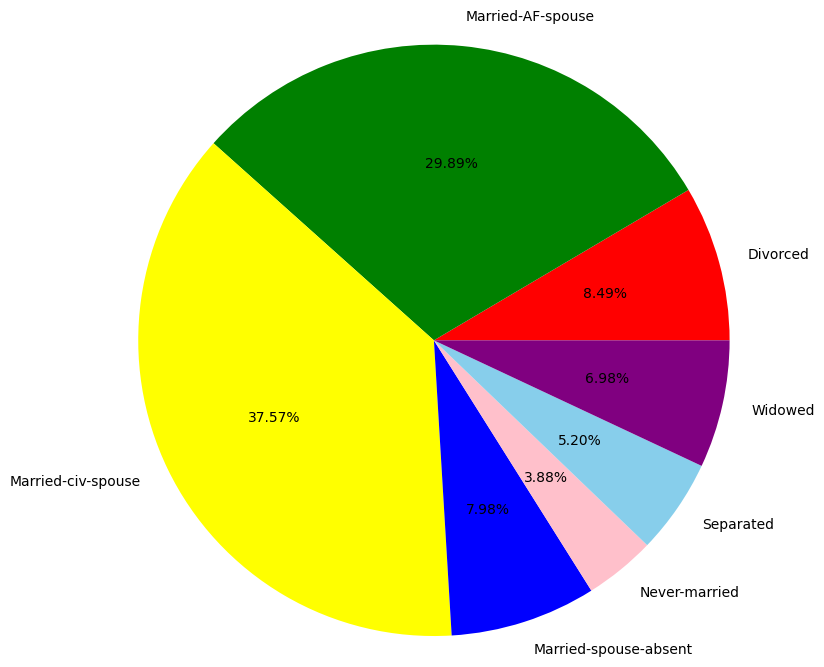

In [ ]:
# probability of belonging to the group with the highest income
marital_income = dict(dataset.groupby('marital-status')['income'].mean())
label = list(marital_income.keys())
slices = list(marital_income.values())
color=['red','green','yellow','blue','pink','skyblue','purple']
plt.pie(slices,labels=label,colors=color,radius=2,autopct="%0.2f%%")
plt.show()

Above pie chart shows marital statewise Probability of earning >50k </p>
Probabilities are what we would expect. Married people have more probability than the rest.

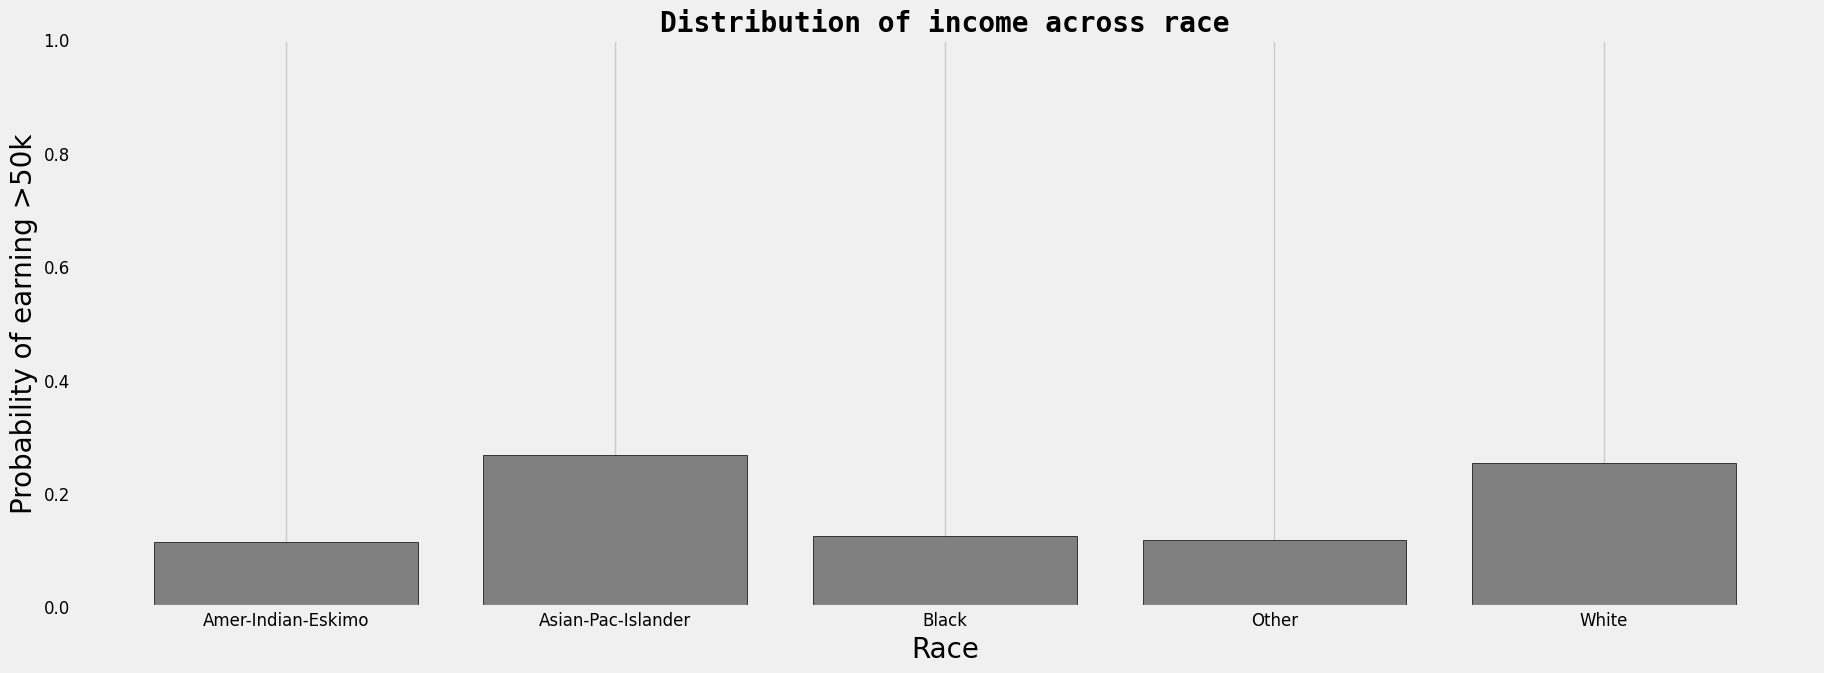

In [ ]:
from pandas.core.groupby.ops import DataSplitter
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
race_income = dataset.groupby('race')['income'].mean()
plt.ylim(0,1)
plt.bar(race_income.index.astype(str), race_income,
       color = 'gray', edgecolor='black')
plt.ylabel('Probability of earning >50k', size=20)
plt.xlabel('Race', size=20)
plt.grid(axis='y')
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.tick_params(labelsize=12)
plt.show()



*   As we see Asian-Pac-Islander and White people have increased probability of earning more than 50k



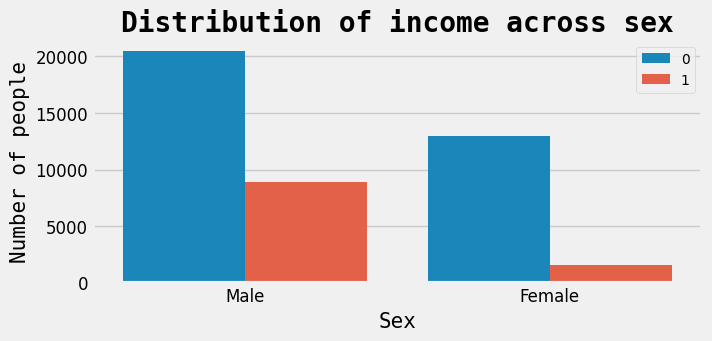

In [ ]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(dataset['gender'], hue=dataset['income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

Males have higher probability of earning >50k than females.

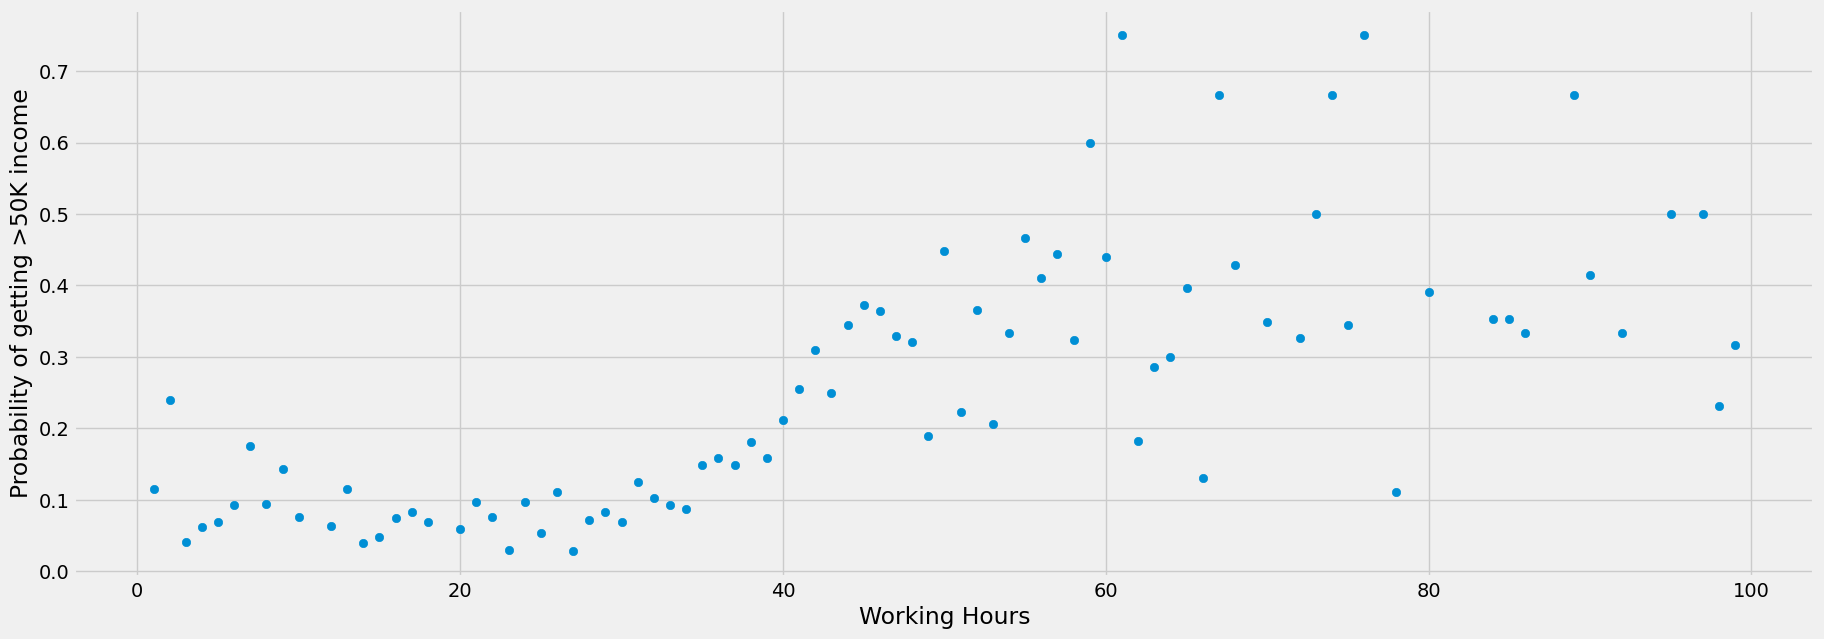

In [ ]:
dt = {}
dttotl = dict(dataset['hours-per-week'].value_counts())
prob = {}

for index, row in dataset.iterrows():
    
    if (row['income'] == 1):
        try:
            dt[row['hours-per-week']] += 1
        except:
            dt[row['hours-per-week']] = 1

for key in dt:
    prob[key] = dt[key] / dttotl[key] # Calculates the probability of getting >50K income for a particular education.

hours = list(prob.keys())
pb = list(prob.values())

plt.figure(figsize = (20, 7))
plt.scatter(hours, pb)
plt.xlabel("Working Hours")
plt.ylabel("Probability of getting >50K income")
plt.show()



*   Above scatter plot shows the correlation between income (here scale of income is probability form) and working hours per week of the person
*   Here we can observe positive correlation i.e as working hours per week increases the probability of having salary >50k increases



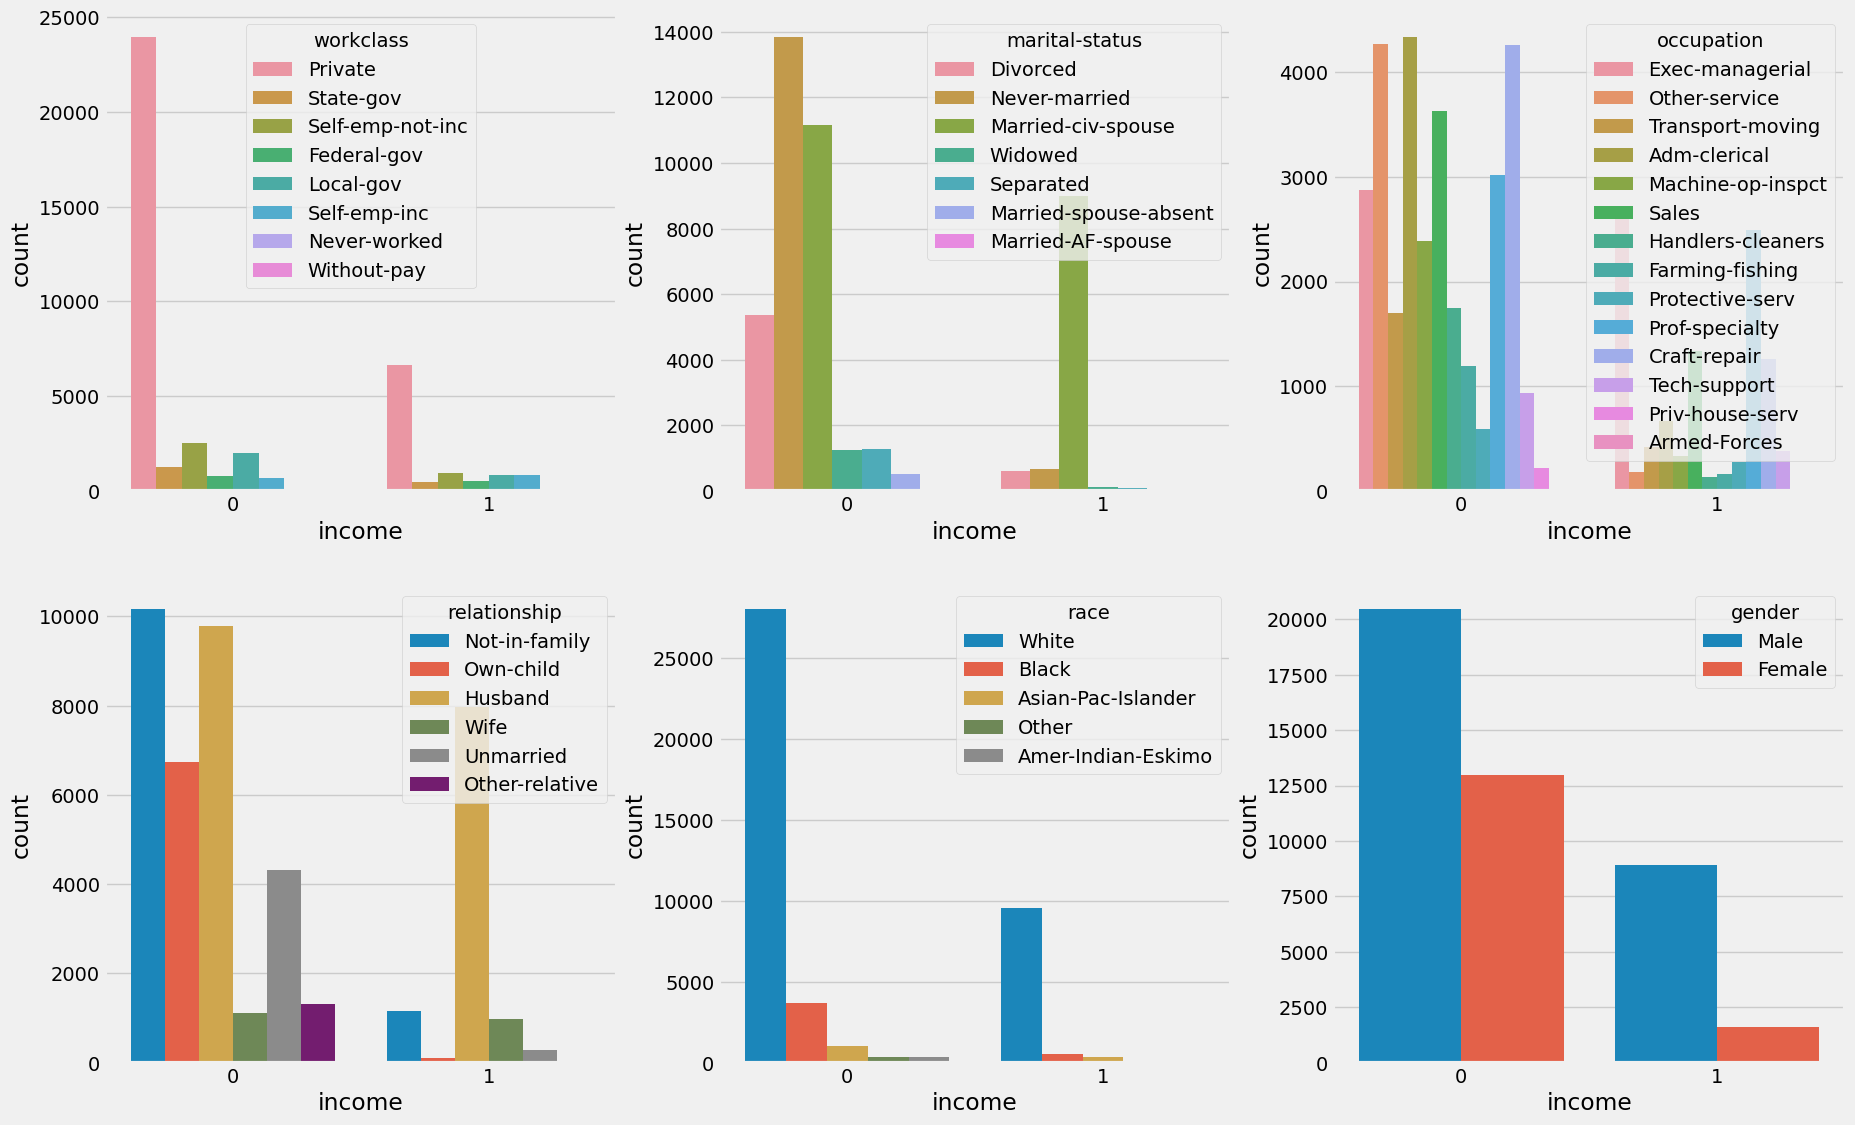

In [ ]:
#Group categorical features by the output variable
cat = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender']
plt.figure(figsize = (20,20))
plotnumber = 1
for i in cat:
    plt.subplot(3,3,plotnumber)
    plt.xlabel(i)
    sns.countplot(x = 'income', hue = i, data = dataset)
    plotnumber+=1
plt.show()

In [ ]:
dataset.groupby('income').mean()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
income,,,,,,
0,36.837914,190079.683364,9.591704,145.362989,55.288167,38.822632
1,44.273721,188380.083761,11.607815,4108.082810,193.028142,45.446948


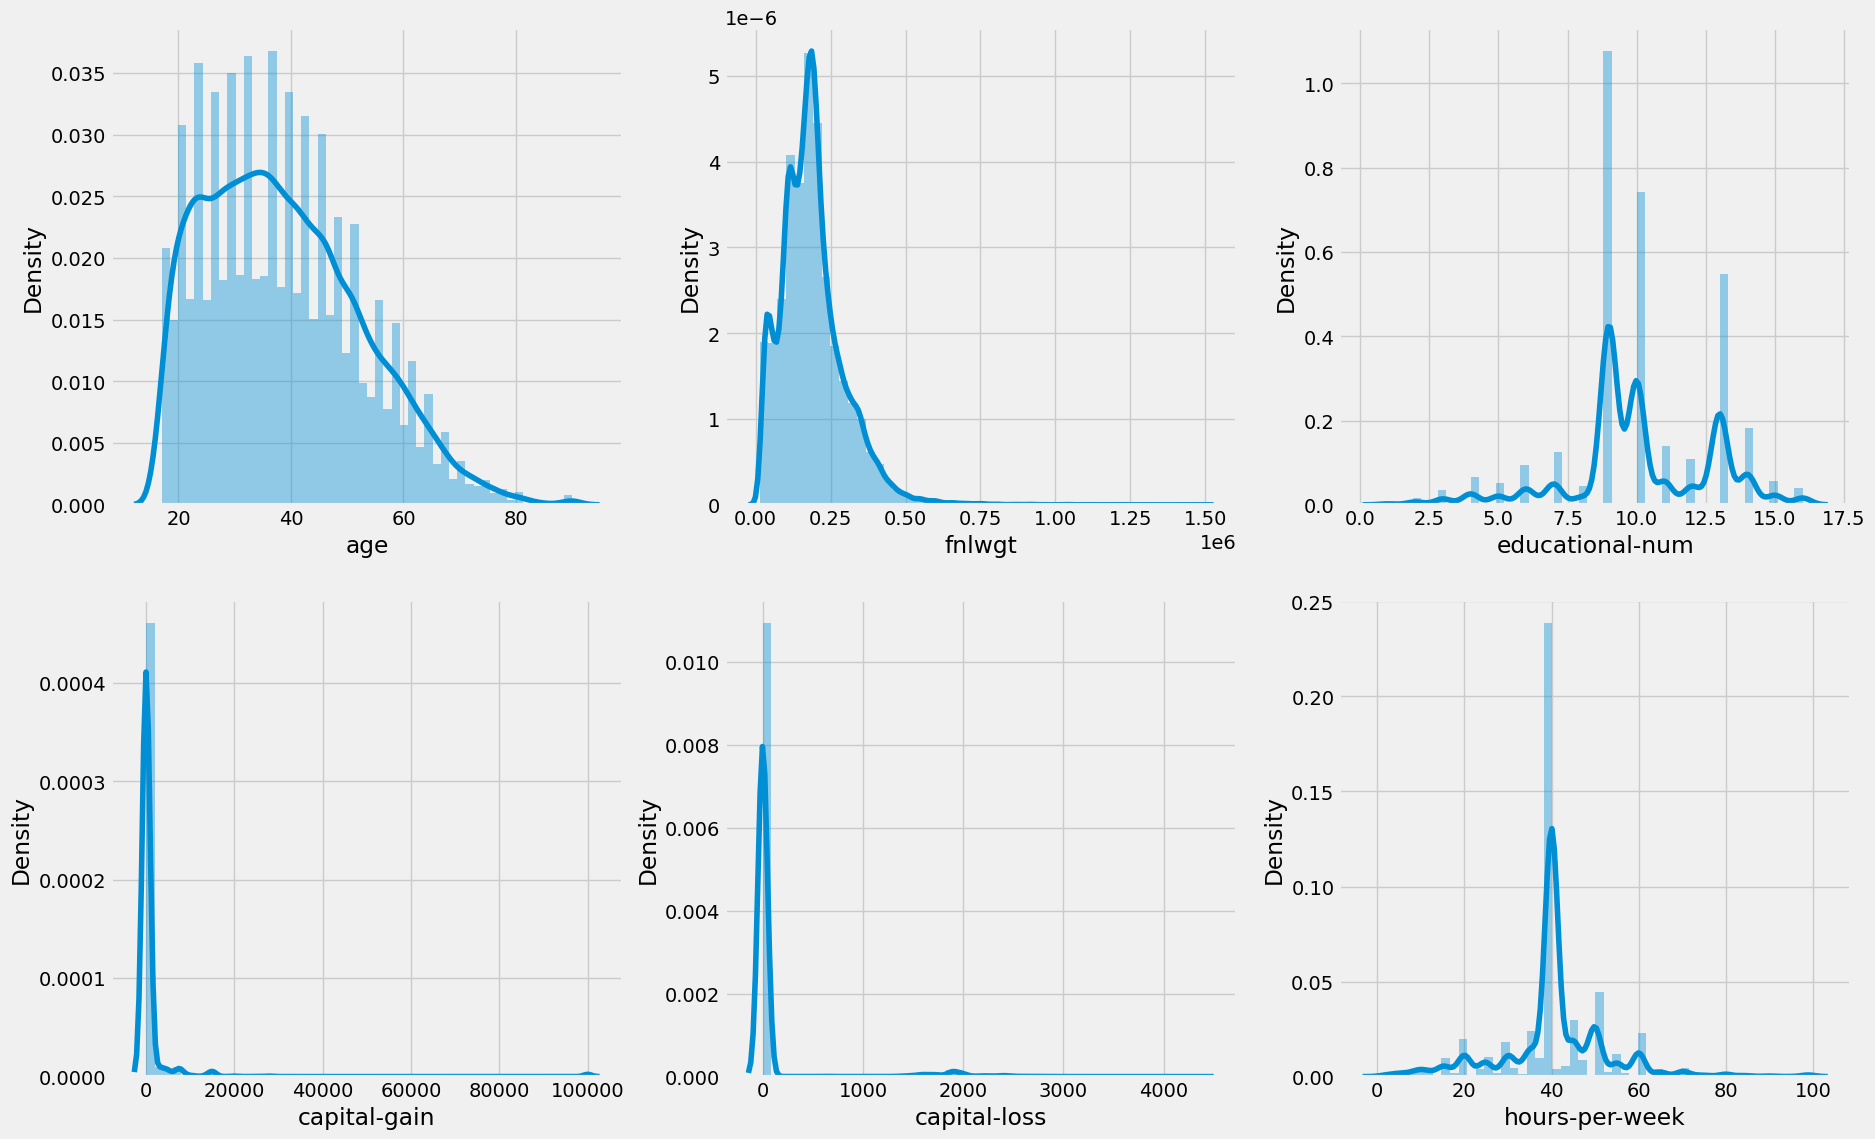

In [ ]:
#Plotting a distribution of numerical values
numerical = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
plt.figure(figsize = (20, 20))
plotnumber =1
for i in numerical:
    plt.subplot(3,3,plotnumber)
    plt.xlabel(i)
    sns.distplot(dataset[i])
    plotnumber+=1
plt.show()

### 2.3: Multivariate Analysis

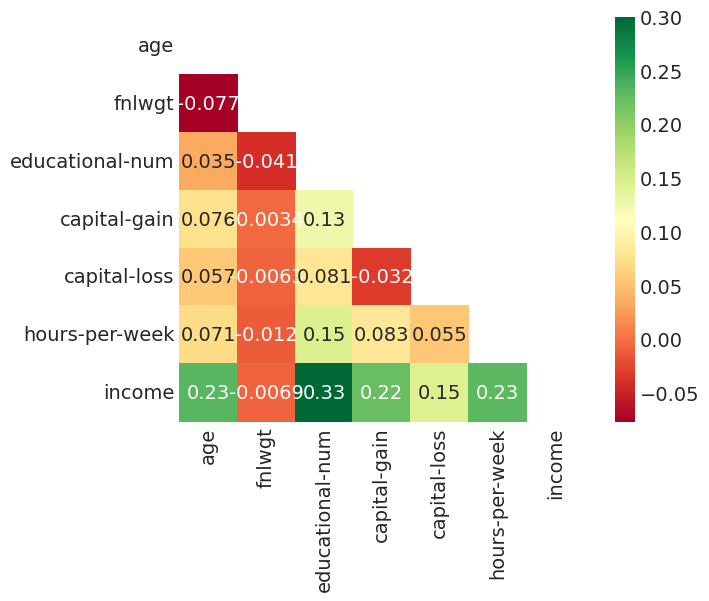

In [ ]:
corr = dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
# plt.savefig('multi2.png')
plt.show()

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
        
<li><p style="font-family:verdana;">
In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.
</p></li>    

<li><p style="font-family:verdana;">
From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.
</p></li>    

</ul>

</div>

## Step 3: Data Preprocessing

### 3.1: Fixing NaN values in the dataset

In [10]:
columns_with_nan = ['workclass', 'occupation', 'native-country']

In [11]:
for col in columns_with_nan:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True) # Replacing with mode values as catogorical attributes are there

In [12]:
# Checking null values again
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass          0.0 %
fnlwgt             0.0 %
education          0.0 %
educational-num    0.0 %
marital-status     0.0 %
occupation         0.0 %
relationship       0.0 %
race               0.0 %
gender             0.0 %
capital-gain       0.0 %
capital-loss       0.0 %
hours-per-week     0.0 %
native-country     0.0 %
income             0.0 %
dtype: object

### 3.2 One Hot Encoding

In [13]:
df = dataset

In [14]:
target = 'income'
num_features = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'educational-num']
cat_features = ['workclass','education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

In [15]:
class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X = X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns = new_columns, index = X.index)
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}_{self.categories_[i][j]}')
                j += 1
        return new_columns

In [16]:
encoder = OneHotEncoder()
encoder_cols = encoder.fit_transform(df[cat_features])

In [17]:
# Add one-hot encoded columns to numerical features and target column
df = pd.concat([pd.concat([df[num_features], encoder_cols], axis=1), df[target]], axis=1)

In [18]:
df.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,educational-num,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,67,366425,99999,0,60,16,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,17,244602,0,0,15,8,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,31,174201,0,0,40,13,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,58,110199,0,0,40,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,25,149248,0,0,40,10,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


### 3.3: Feature Selection

In [19]:
features = df.columns.tolist()
features.remove(target)
X = df[features]


y = df[target]

In [20]:
def ConfusionMatrix(classifier, X=X, y=y, confusionMatrix = True, plotConfusionMatrix = True):
        '''ConfusionMatrix function split data, fit data to model and give 
        a prediction for a given model and data. After that draw Confusion Matrix or 
        Plot Confusion Matrix to show the score'''
        
        #split dataset into train and test data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, 
                                                            stratify=y)

        # Fit the classifier to the data
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        #computing the confusion matrix with each row corresponding to the true class
        if(confusionMatrix):
            print(confusion_matrix(y_test, y_pred))

        #drawing Plot Confusion Matrix
        if(plotConfusionMatrix):
            plot_confusion_matrix(classifier, X_test, y_test)  
            plt.show() 

In [21]:
def GridSearch(param, estimator, X=X, y=y):
    # split into a training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    grid_rf = GridSearchCV(estimator, param, refit = True, verbose = 3, n_jobs=-1) 

    # fitting the model for grid search 
    grid_rf.fit(X_train, y_train) 

    # print best parameter after tuning 
    print(grid_rf.best_params_) 
    grid_rf_predictions = grid_rf.predict(X_test) 

    # print classification report 
    print(classification_report(y_test, grid_rf_predictions))

In [83]:
def CVmodel(nFolds = 5, randomState=2020, features=features, lin_reg = False, lin_reg_without_fi = False,
            cutoff=0.5, debug= False, model = SVC(), df = df, pipeline = False):
    
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)
    
    # predictions for individual folds
    predictions = []

    # the index in the original file
    indices = []
    true=[]
    
    if lin_reg:
        for train, test in kf.split(df.index.values):
            if debug:
                print(model)
            model.fit(df.iloc[train][features], df.iloc[train][target])

            # predsTrain = model.predict_proba(df.iloc[train][features])[:,1]
            # preds = model.predict_proba(df.iloc[test][features])[:,1]
            preds, y_test = model.predict(df.iloc[test][features], round(cutoff,1))
            
            # information about predictions for this fold
            predictions.append(preds.tolist().copy())
            # indexed in the original data frame
            indices.append(df.iloc[test].index.tolist().copy())
            
            true = (df.iloc[test][target]==1)
            if(lin_reg_without_fi == False):
                feature_importance = model.coef_
        if(lin_reg_without_fi):
            return predictions, indices, true
            
        return predictions, indices, feature_importance, true
        
        
    if(pipeline):
        for train, test in kf.split(df.index.values):
            if debug:
                print(model)
            model.fit(df.iloc[train][features], df.iloc[train][target])

            # predsTrain = model.predict_proba(df.iloc[train][features])[:,1]
            preds = model.predict_proba(df.iloc[test][features])[:,1]

            # information about predictions for this fold
            predictions.append(preds.tolist().copy())

            # indexed in the original data frame
            indices.append(df.iloc[test].index.tolist().copy())
        
        return predictions, indices, true
        
    for train, test in kf.split(df.index.values):
        if debug:
            print(model)
        model.fit(df.iloc[train][features], df.iloc[train][target])

        # predsTrain = model.predict_proba(df.iloc[train][features])[:,1]
        preds = model.predict_proba(df.iloc[test][features])[:,1]

        # information about predictions for this fold
        predictions.append(preds.tolist().copy())

        # indexed in the original data frame
        indices.append(df.iloc[test].index.tolist().copy())

        true.append(df.iloc[test][target]==1)

        feature_importance = model.feature_importances_
        
    return predictions, indices, feature_importance, true

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [24]:
selector.fit(X, y)

ExtraTreesClassifier(random_state=42)

In [25]:
feature_imp = selector.feature_importances_

In [26]:
imp_feature = []

In [27]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))
    imp_feature.append(round((val * 100), 2))

0 15.37
1 17.84
2 6.83
3 2.23
4 9.62
5 3.07
6 0.46
7 0.49
8 0.0
9 0.87
10 0.67
11 0.78
12 0.4
13 0.02
14 0.19
15 0.27
16 0.1
17 0.04
18 0.07
19 0.22
20 0.14
21 0.26
22 0.26
23 1.82
24 0.42
25 1.05
26 1.28
27 0.01
28 0.79
29 0.58
30 0.5
31 0.03
32 6.72
33 0.1
34 2.33
35 0.15
36 0.16
37 0.44
38 0.01
39 0.66
40 2.29
41 0.38
42 0.29
43 0.37
44 0.8
45 0.02
46 1.87
47 0.23
48 0.55
49 0.39
50 0.36
51 4.82
52 1.45
53 0.2
54 1.33
55 0.64
56 1.02
57 0.14
58 0.3
59 0.45
60 0.11
61 0.59
62 1.02
63 0.77
64 0.03
65 0.14
66 0.07
67 0.03
68 0.08
69 0.03
70 0.02
71 0.03
72 0.1
73 0.03
74 0.1
75 0.06
76 0.01
77 0.03
78 0.0
79 0.0
80 0.01
81 0.02
82 0.08
83 0.04
84 0.04
85 0.08
86 0.05
87 0.07
88 0.01
89 0.25
90 0.01
91 0.01
92 0.02
93 0.1
94 0.04
95 0.04
96 0.06
97 0.01
98 0.05
99 0.03
100 0.01
101 0.01
102 0.53
103 0.03
104 0.02


In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Columns: 105 entries, age to native-country_Yugoslavia
dtypes: float64(99), int64(6)
memory usage: 35.2 MB


### 3.4: Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler

In [ ]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

### 3.5: Fixing imbalanced dataset using Oversampling

In [40]:
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    76.07 %
1    23.93 %
Name: income, dtype: object

In [41]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [42]:
ros.fit(X, y)

RandomOverSampler(random_state=42)

In [43]:
X_resampled, Y_resampled = ros.fit_resample(X, y)

In [44]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

1    50.0 %
0    50.0 %
Name: income, dtype: object

### 3.6: Creating a train test split

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [46]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (53502, 105)
X_test shape: (13376, 105)
Y_train shape: (53502,)
Y_test shape: (13376,)


## Step 4: Data Modelling

### 4.1: Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [48]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [49]:
Y_pred_log_reg = log_reg.predict(X_test)

### 4.2: KNN Classifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [51]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [52]:
Y_pred_knn = knn.predict(X_test)

### 4.3: Support Vector Classifier

In [53]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [54]:
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [55]:
Y_pred_svc = svc.predict(X_test)

### 4.4: Bernoulli Naive Bayes Classifier

In [56]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()

In [57]:
nb.fit(X_train, Y_train)

BernoulliNB()

In [58]:
Y_pred_nb = nb.predict(X_test)

### 4.5: Decision Tree Classifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

In [60]:
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [61]:
Y_pred_dec_tree = dec_tree.predict(X_test)

### 4.6: Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

In [63]:
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [64]:
Y_pred_ran_for = ran_for.predict(X_test)

## Step 5: Model Evaluation

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [66]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 82.12
F1 score: 82.55


In [67]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 82.95
F1 score: 83.97


In [68]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 82.65
F1 score: 83.46


In [70]:
print('Bernoulli Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Bernoulli Naive Bayes Classifier:
Accuracy score: 78.31
F1 score: 79.55


In [71]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 91.58
F1 score: 92.01


In [72]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.97
F1 score: 93.28


# Step 6: Hyper parameter Tuning

## DECISION TREE

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


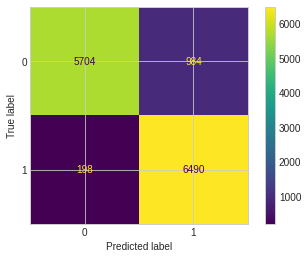

In [ ]:
# Create Decision Tree classifer object
tree = DecisionTreeClassifier()

ConfusionMatrix(classifier=tree, confusionMatrix=False)

## RANDOM FOREST ALGORITHM

In [ ]:
param = {'max_depth': [2, 10, 20],
         'n_estimators': [100, 500],
         'max_features': [10 , 20]}

GridSearch(param = param, estimator = RandomForestClassifier())

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'max_depth': 20, 'max_features': 20, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8324
           1       0.86      0.98      0.91      8396

    accuracy                           0.91     16720
   macro avg       0.92      0.91      0.91     16720
weighted avg       0.92      0.91      0.91     16720



Best score: {'max_depth': 20, 'max_features': 20, 'n_estimators': 500}

In [ ]:
param = {'max_depth': [20, 50],
         'max_features': [10, 30],
         'min_samples_split': [10, 30]}

GridSearch(param=param, estimator=RandomForestClassifier())

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'max_depth': 50, 'max_features': 30, 'min_samples_split': 10}
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      8324
           1       0.87      0.95      0.91      8396

    accuracy                           0.90     16720
   macro avg       0.90      0.90      0.90     16720
weighted avg       0.90      0.90      0.90     16720



On camparing both the confusion matrix we get best parameters: {'max_depth': 20, 'max_features': 20, 'min_samples_split': 30, and n_estimators}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


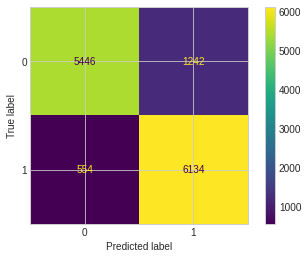

In [ ]:
#Random Forest model 
rand_forest = RandomForestClassifier(random_state=2020, n_jobs=-1, n_estimators=500, 
                                 max_depth=20, max_features=30, min_samples_split=30)

ConfusionMatrix(classifier=rand_forest, confusionMatrix=False)

## LINEAR REGRESSION ALGORITHM

In [84]:
class LinearRegression(SklearnLinearRegression):

    def predict(self, X_test, cutoff):
        y_pred = super().predict(X_test) 
        
        # initialise a matrix full with zeros
        y_pred_classes = np.zeros_like(y_pred)
        # add a 1 if the cutoff was breached
        y_pred_classes[y_pred > cutoff] = 1       
        
        return y_pred_classes, y_test
        

In [85]:
def ConfusionMatrixOrHeatMap(y_true, y_pred, confusionMatrix = True, 
                                       HeatmapConfusionMatrix = True):
    #confusion matrix
    c = confusion_matrix(y_true, y_pred)
    
    if(confusionMatrix):
        return c
    if(HeatmapConfusionMatrix):
        #drawing Plot Confusion Matrix
        sns.heatmap(c, annot=True, fmt="d")
        plt.show() 

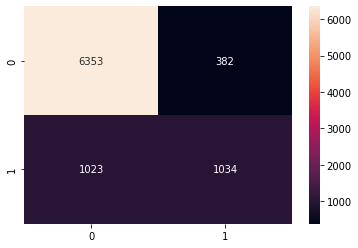

In [86]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#create object of LinearRegression class
lr = LinearRegression()
# Fit the classifier to the data
lr.fit(X=X_train, y=y_train)
#classifing prediction by threshold 0.7
y_pred_classes, y_test_lr = lr.predict(X_test, 0.5)

ConfusionMatrixOrHeatMap(y_test_lr, y_pred_classes, confusionMatrix = False)


Changing cutoff

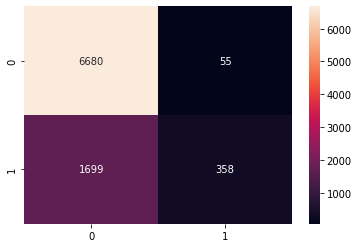

In [87]:
#create object of LinearRegression class
lr = LinearRegression()
# Fit the classifier to the data
lr.fit(X=X_train, y=y_train)
#classifing prediction by threshold 0.7
y_pred_classes, y_test_lr = lr.predict(X_test, 0.7)

ConfusionMatrixOrHeatMap(y_test_lr, y_pred_classes, confusionMatrix = False)

## LOGISTIC REGRESSION ALGORITHM

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


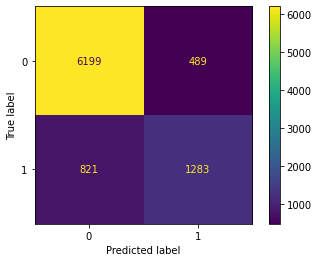

In [ ]:
#Standardization of data and KNN model 
logreg_scaler = Pipeline(steps=[
                ('scaler', StandardScaler()),
                ('logreg', LogisticRegression())
                ])
ConfusionMatrix(classifier=logreg_scaler, confusionMatrix=False)

## K-NEAREST NEIGHBORS ALGORITHM

In [ ]:
#Standardization of data and KNN model 
pipe = Pipeline(steps=[
                ('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier())
                ])

param = {'knn__n_neighbors': [10, 100],
         'knn__weights': ['uniform', 'distance'],
         'knn__p': [1, 2]}

GridSearch(param=param, estimator=pipe)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'knn__n_neighbors': 10, 'knn__p': 1, 'knn__weights': 'distance'}
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8324
           1       0.83      0.98      0.90      8396

    accuracy                           0.89     16720
   macro avg       0.90      0.89      0.89     16720
weighted avg       0.90      0.89      0.89     16720



Best parameters: {'knn__n_neighbors': 10, 'knn__p': 1, 'knn__weights': 'uniform'}

In [ ]:
#Standardization of data and KNN model 
pipe = Pipeline(steps=[
                    ('scaler', StandardScaler()),
                    ('knn', KNeighborsClassifier())
                ])

param = {'knn__n_neighbors': [10, 50],
         'knn__weights': ['uniform'],
         'knn__p': [1]}

GridSearch(param=param, estimator=pipe)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'knn__n_neighbors': 50, 'knn__p': 1, 'knn__weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      8374
           1       0.71      0.54      0.61      2616

    accuracy                           0.84     10990
   macro avg       0.79      0.74      0.76     10990
weighted avg       0.83      0.84      0.83     10990



 Best parameters: {'knn__n_neighbors': 50, 'knn__p': 1, 'knn__weights': 'uniform'}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


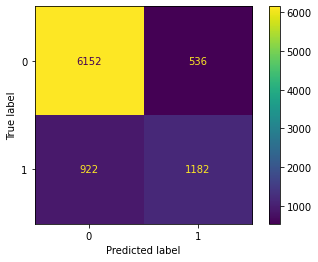

In [ ]:
#Standardization of data and KNN model 
knn_standarization = Pipeline(steps=[
                ('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=100, p=1, weights='uniform'))
                ])

ConfusionMatrix(classifier=knn_standarization, confusionMatrix=False)

## SUPPORT VECTOR MACHINE ALGORITHM

In [ ]:
# split into a training and testing set
pipe = Pipeline(steps=[
                ('scaler', StandardScaler()), 
                ('svc', SVC())
                ])

param = {'svc__C': [1, 10],
         'svc__kernel': ['linear', 'poly']}

GridSearch(param=param, estimator=pipe)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'svc__C': 1, 'svc__kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      8374
           1       0.73      0.57      0.64      2616

    accuracy                           0.85     10990
   macro avg       0.80      0.75      0.77     10990
weighted avg       0.84      0.85      0.84     10990



Best parameters: {'C': 1, 'kernel': 'linear'}

In [ ]:
# split into a training and testing set
pipe = Pipeline(steps=[
                ('scaler', StandardScaler()), 
                ('svc', SVC())
                ])

param = {'svc__kernel': ['linear', 'rbf'],
         'svc__gamma': ['scale', 'auto']
        }

GridSearch(param=param, estimator=pipe)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'svc__gamma': 'scale', 'svc__kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      8374
           1       0.73      0.57      0.64      2616

    accuracy                           0.85     10990
   macro avg       0.80      0.75      0.77     10990
weighted avg       0.84      0.85      0.84     10990



Best parameters: {'gamma': 'scale', 'kernel': 'linear'}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


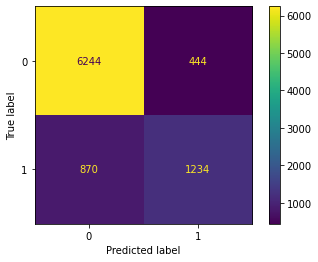

In [ ]:
#Standardization of data and KNN model 
svm_standarization = Pipeline(steps=[
                ('scaler', StandardScaler()),
                ('svm',  SVC(kernel='linear', C=10, gamma='scale', probability=True))
                ])

ConfusionMatrix(classifier=svm_standarization, confusionMatrix=False)

# Conclusion 

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Conclusion:</h3>

<ul>
    
<li><p style="font-family:verdana;">
In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier and Bernoulli Naive Bayes Classifier and hyper tune there parameters to find which models gives us the best results
</p></li>    

<li><p style="font-family:verdana;">
After evaluating different models we find random forest classifier gives the highest accuracy score of 93 and f1 score of 93.28.
</p></li>    

</ul>

</div>